<a href="https://colab.research.google.com/github/Eduard25/Redes/blob/master/Tarea6_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Layer, Input
from keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np
import math

In [4]:
loss_tracker = keras.metrics.Mean(name="loss")

In [18]:
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker]

    def train_step(self, data):
        batch_size =100
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = 3.*tf.math.sin(math.pi*x) #Así tensorflow entiende que se está aplicando un Seno


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}


In [19]:
model = Funsol()

model.add(Dense(600,activation='tanh', input_shape=(1,)))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "funsol_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 600)               1200      
                                                                 
 dense_13 (Dense)            (None, 200)               120200    
                                                                 
 dense_14 (Dense)            (None, 200)               40200     
                                                                 
 dense_15 (Dense)            (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
4/4 [==============================] - 3s 16ms/step - loss: 2.5623
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 1.5261
Epoch 3/500
4/4 [==============================] - 0s 21ms/step - loss: 1.3368
Epoch 4/500
4/4 [==============================] - 0s 16ms/step - loss: 1.3408
Epoch 5/500
4/4 [==============================] - 0s 16ms/step - loss: 1.4709
Epoch 6/500
4/4 [==============================] - 0s 21ms/step - loss: 1.2516
Epoch 7/500
4/4 [==============================] - 0s 14ms/step - loss: 1.2010
Epoch 8/500
4/4 [==============================] - 0s 17ms/step - loss: 1.1701
Epoch 9/500
4/4 [==============================] - 0s 16ms/step - loss: 1.0796
Epoch 10/500
4/4 [==============================] - 0s 24ms/step - loss: 0.9693
Epoch 11/500
4/4 [==============================] - 0s 17ms/step - loss: 0.9466
Epoch 12/500
4/4 [==============================] - 0s 20ms/step - loss: 0.8481
Epoch 13/500
4/4 [==============================]

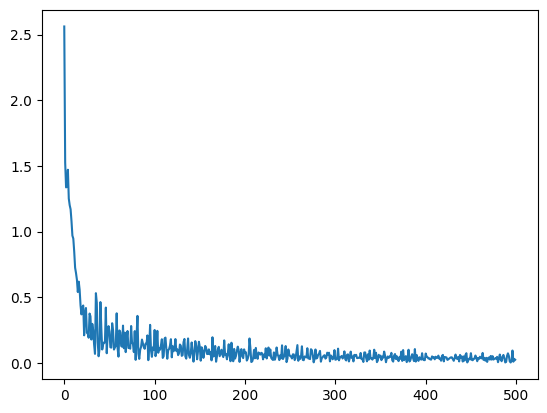

In [20]:
model.compile(optimizer=RMSprop(), metrics=['loss'])

x=tf.linspace(-1,1,100)

history = model.fit(x,epochs=500,verbose=1)
plt.plot(history.history["loss"])
plt.show()

4/4 [==============================] - 0s 7ms/step


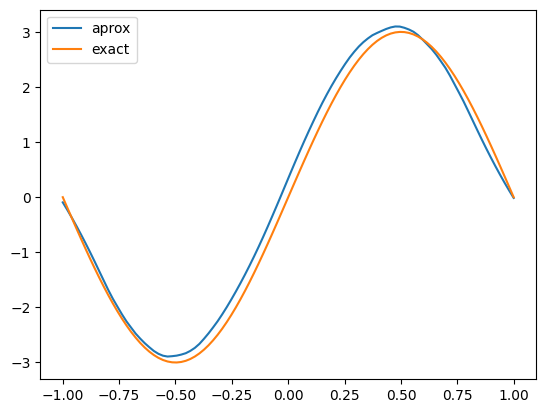

In [28]:
x_testv = tf.linspace(-1,1,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,3.*tf.math.sin(math.pi*x),label="exact")
plt.legend()
plt.show()